## Further Cleaning, EDA, Feature Engineering and Linear Regression Models

In [ ]:
# importing relavent libraries for statistical calculations, plotting and pandas

In [9]:
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
import seaborn as sns
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 950)
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler

In [11]:
# Check residuals function below to inspect the accuracy with which data is predicted

In [10]:
def checkresiduals(df, target, sm_model):
    # checking for our model - Homoscedasticity,  Independence of residuals
    pred_val = sm_model.fittedvalues.copy()
    true_val = df[target].values.copy()
    residual = true_val - pred_val

    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
#     fig, ax = plt.subplots(figsize=(8, 6))
    ax1.hist(residual, density=True, bins=30)
    ax2.scatter(df[target],residual)
    ax2.set_title('Residual Scatterplot')
    plt.show()

### Further Data Cleaning

The data is inspected for further issues such as NaN objects and missing information, outliers, elimination of unwanted variables and ensuring numerical data is integer or float type objects.

In [13]:
# import cleaned data in the json files 

In [11]:
df1 = pd.read_json('cleaned_json/cars_data_full_v2.json')
df2 = pd.read_json('cleaned_json/cars_data_full_v2_2059.json')

In [4]:
df1.head()

,brand,city_mpg,drivetrain,engine,exterior_color,fuel_type,highway_mpg,interior_color,make,mileage,model,price,stock,transmission,trim,vin,year
0,2014 Mercedes-Benz CLA 45 AMG 4MATIC,23.0,AWD,2.0L I4 16V GDI SOHC Turbo,White,Gasoline,31.0,NaN,Mercedes-Benz,47069,CLA,26986,10697A,7-Speed Automatic with Auto-Shift,NaN,WDDSJ5CB7EN106977,2014
1,2016 Nissan Maxima 3.5 S,22.0,FWD,3.5L V6 24V MPFI DOHC,Pearl White,Gasoline,30.0,Charcoal,Nissan,33362,Maxima,17787,GC430278,Automatic CVT,NaN,1N4AA6AP3GC430278,2016
2,2016 BMW 335 Gran Turismo i xDrive,20.0,AWD,3.0L I6 24V GDI DOHC Turbo,White,Gasoline,30.0,NaN,BMW,32676,335,25799,GD869748,8-Speed Automatic,NaN,WBA3X9C59GD869748,2016
3,2018 Honda Accord Sport,26.0,FWD,Intercooled Turbo Regular Unleaded I-4 1.5 L/91,Crystal Black Pearl,Gasoline,35.0,Black,Honda,7088,Accord,23181,UH5512P,Variable,NaN,1HGCV1F39JA182476,2018
4,2016 Nissan Pathfinder SL,19.0,4WD,Regular Unleaded V-6 3.5 L/213,Black,Gasoline,26.0,Black,Nissan,54381,Pathfinder,16695,290,1-Speed CVT w/OD,NaN,5N1AR2MM7GC650290,2016


In [12]:
df1.columns

Index(['brand', 'city_mpg', 'drivetrain', 'engine', 'exterior_color',
       'fuel_type', 'highway_mpg', 'interior_color', 'make', 'mileage',
       'model', 'price', 'stock', 'transmission', 'trim', 'vin', 'year'],
      dtype='object')

In [13]:
df1.city_mpg.value_counts()

19.0    102
21.0     99
22.0     86
25.0     82
20.0     75
23.0     60
17.0     59
16.0     59
18.0     54
24.0     47
15.0     35
26.0     33
28.0     24
27.0     23
14.0     14
29.0     11
31.0      9
30.0      5
34.0      4
51.0      3
13.0      3
11.0      2
32.0      1
49.0      1
43.0      1
40.0      1
44.0      1
Name: city_mpg, dtype: int64

In [21]:
df2.loc[df2.city_mpg>80]

,brand,city_mpg,drivetrain,engine,exterior_color,fuel_type,highway_mpg,interior_color,make,mileage,model,price,stock,transmission,vin,year
2053,2018 Tesla Model S 75D,102.0,NaN,ELECTRIC,Black,Gasoline,105.0,black,Tesla,10755,Model,60995,19806,Automatic,5YJSA1E27JF266723,2018


In [15]:
# drop data that was deemed not useful or too complicated to incorporate in the model

In [5]:
df1.drop(['stock','interior_color','trim','vin'], axis=1, inplace = True)
df2.drop(['stock','interior_color','vin'], axis=1, inplace = True)

In [17]:
# Concat the two dataframes into one and reset index

In [6]:
dfs = [df1, df2]
df = pd.concat(dfs)
df = df.reset_index()

In [19]:
df.shape

(3055, 14)

In [7]:
df.head()

,index,brand,city_mpg,drivetrain,engine,exterior_color,fuel_type,highway_mpg,make,mileage,model,price,transmission,year
0,0,2014 Mercedes-Benz CLA 45 AMG 4MATIC,23.0,AWD,2.0L I4 16V GDI SOHC Turbo,White,Gasoline,31.0,Mercedes-Benz,47069,CLA,26986,7-Speed Automatic with Auto-Shift,2014
1,1,2016 Nissan Maxima 3.5 S,22.0,FWD,3.5L V6 24V MPFI DOHC,Pearl White,Gasoline,30.0,Nissan,33362,Maxima,17787,Automatic CVT,2016
2,2,2016 BMW 335 Gran Turismo i xDrive,20.0,AWD,3.0L I6 24V GDI DOHC Turbo,White,Gasoline,30.0,BMW,32676,335,25799,8-Speed Automatic,2016
3,3,2018 Honda Accord Sport,26.0,FWD,Intercooled Turbo Regular Unleaded I-4 1.5 L/91,Crystal Black Pearl,Gasoline,35.0,Honda,7088,Accord,23181,Variable,2018
4,4,2016 Nissan Pathfinder SL,19.0,4WD,Regular Unleaded V-6 3.5 L/213,Black,Gasoline,26.0,Nissan,54381,Pathfinder,16695,1-Speed CVT w/OD,2016


In [25]:
# Drop outliers where price is over $80,000
df = df[df['price']<80000]
# Drop the one car with mpg under 80- this also gets rid of the NaN values
df = df[df['city_mpg']<80]
# determine the row index of a car with a 'Not provided' milage to be dropped from the table
notgiven = df[df['mileage']=='Not provided'].index
df.drop(notgiven, inplace = True)
# create age of car based on 2019
df['yr_old'] =  df['year'].map(lambda x: 2019-x)
# checking all milage is turned into integers
df['mileage'] = df['mileage'].astype(int)
# dropping column of old index resulting from concating the two data frames from the previous step
df.drop(['index'], axis=1, inplace = True)
# Drop outliers with 0 highway mpg
dfzero = df[df['highway_mpg']==0].index
df.drop(dfzero, inplace = True)

In [21]:
df.shape #3055 - 2677 = 378 rows were dropped as a result of the above

(2677, 14)

## Exploratory Data Analysis

Here we aim to test variable assumptions, generate hypotheses and prepare the data for modeling. This will be done by reading up on the business of selling cars and what are the factors affecting it, visualizing the data and identifying patterns in it.

###### Distribution of city_mpg

In [1]:
sns.distplot(df.city_mpg)

NameError: name 'sns' is not defined

###### Distribution of highway_mpg

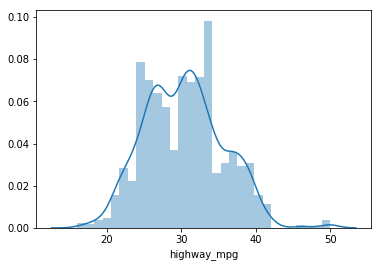

In [27]:
sns.distplot(df.highway_mpg)

###### Distribution of price

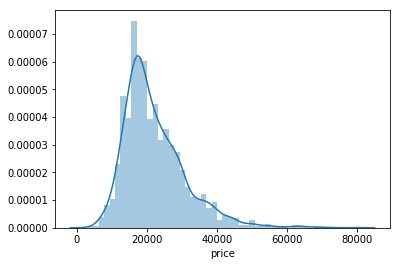

In [28]:
sns.distplot(df.price)

#### Examination of outliers from graph

###### View city_mpg over 45

In [30]:
df.loc[df.city_mpg>45]

,brand,city_mpg,drivetrain,engine,exterior_color,fuel_type,highway_mpg,make,mileage,model,price,transmission,year,yr_old
539,Certified 2017 Honda Accord Hybrid Touring,49.0,FWD,NaN,White,Hybrid,47.0,Honda,49639,Accord,21688,Continuously Variable,2017,2
848,2014 Toyota Prius Two,51.0,FWD,1.8L I4 16V MPFI DOHC Hybrid,Barcelona Red Metallic,Hybrid,48.0,Toyota,113328,Prius,9942,Automatic CVT,2014,5
926,2017 Kia Niro EX,51.0,FWD,Gas/Electric I-4 1.6 L/96,Crimson Red,Hybrid,46.0,Kia,1266,Niro,22995,Automatic,2017,2
928,Certified 2017 Kia Niro EX,51.0,FWD,4,Crimson Red,Hybrid,46.0,Kia,1266,Niro,22995,Dual Clutch 6-Speed Automatic,2017,2
1044,2017 Toyota Prius Two,54.0,FWD,1.8L I4 16V MPFI DOHC Hybrid,Gray,Hybrid,50.0,Toyota,22551,Prius,18760,Automatic CVT,2017,2
1087,Certified 2017 Kia Niro EX,51.0,FWD,4,Crimson Red,Hybrid,46.0,Kia,1266,Niro,22995,Dual Clutch 6-Speed Automatic,2017,2
1506,Certified 2016 Toyota Prius TWO,54.0,NaN,1798 CC,Blizzard Pearl,Hybrid,50.0,Toyota,6604,Prius,20969,Continuously Variable Transmission,2016,3
1729,Certified 2016 Toyota Prius THREE,54.0,NaN,1798 CC,Midnight Black Metallic,Hybrid,50.0,Toyota,30264,Prius,17969,Continuously Variable Transmission,2016,3
1994,Certified 2016 Toyota Prius Two,54.0,FWD,1.8L I4 16V MPFI DOHC Hybrid,Hypersonic Red,Hybrid,50.0,Toyota,44393,Prius,17053,Automatic CVT,2016,3
2596,Certified 2016 Toyota Prius TWO,54.0,NaN,1798 CC,Blue Crush Metallic,Hybrid,50.0,Toyota,20478,Prius,20569,Continuously Variable Transmission,2016,3


###### View city_mpg under 20

In [31]:
df.loc[df.city_mpg<20]

,brand,city_mpg,drivetrain,engine,exterior_color,fuel_type,highway_mpg,make,mileage,model,price,transmission,year,yr_old
4,2016 Nissan Pathfinder SL,19.0,4WD,Regular Unleaded V-6 3.5 L/213,Black,Gasoline,26.0,Nissan,54381,Pathfinder,16695,1-Speed CVT w/OD,2016,3
6,2017 Dodge Durango SXT,19.0,AWD,3.6L V6 24V MPFI DOHC,Red,Gasoline,26.0,Dodge,12492,Durango,26498,8-Speed Automatic,2017,2
8,2015 Volvo XC60 T6,17.0,AWD,3.0L I6 24V MPFI DOHC Turbo,Ice White,Gasoline,24.0,Volvo,45825,XC60,18530,6-Speed Automatic,2015,4
10,2018 Dodge Durango GT,19.0,NaN,3.6L V6 DOHC 24V,Black,Gasoline,26.0,Dodge,38893,Durango,25995,Automatic,2018,1
11,2017 Lexus IS 350 Base,19.0,NaN,NaN,NaN,Gasoline,26.0,Lexus,38902,IS,32995,NaN,2017,2
12,2016 Jeep Grand Cherokee Limited,19.0,4WD,3.6 L,Bright White Clearcoat,Gasoline,26.0,Jeep,46562,Grand,19880,Automatic,2016,3
13,2016 Hyundai Genesis 3.8,16.0,AWD,6 Cylinder,Caspian Black,Gasoline,25.0,Hyundai,36259,Genesis,23599,Automatic,2016,3
14,2014 Jeep Wrangler Unlimited Sahara,16.0,4WD,3.6L V6 24V MPFI DOHC,Dune,Gasoline,21.0,Jeep,41761,Wrangler,24905,6-Speed Manual,2014,5
16,2014 Land Rover Range Rover Sport Supercharged,14.0,4WD,8 Cylinder Engine,Barolo Black Metallic,Gasoline,19.0,Land Rover,73140,Range,49990,Automatic,2014,5
17,2016 Dodge Durango R/T,14.0,AWD,5.7 L,Black,Gasoline,22.0,Dodge,26398,Durango,29800,Automatic,2016,3


###### View highway_mpg under 20

In [32]:
df.loc[df.highway_mpg<20]

,brand,city_mpg,drivetrain,engine,exterior_color,fuel_type,highway_mpg,make,mileage,model,price,transmission,year,yr_old
16,2014 Land Rover Range Rover Sport Supercharged,14.0,4WD,8 Cylinder Engine,Barolo Black Metallic,Gasoline,19.0,Land Rover,73140,Range,49990,Automatic,2014,5
45,2014 Cadillac Escalade ESV Platinum Edition,14.0,AWD,6.2L V8 16V MPFI OHV,Radiant Silver Metallic,Gasoline,18.0,Cadillac,62126,Escalade,36888,6-Speed Automatic,2014,5
55,2016 Land Rover Range Rover Sport 5.0L Superch...,14.0,4WD,5.0L V8 32V GDI DOHC Supercharged,Corris Grey,Gasoline,19.0,Land Rover,40675,Range,49995,8-Speed Automatic,2016,3
82,Certified 2017 Toyota Tundra Platinum,13.0,4WD,5.7L V8 32V MPFI DOHC,Barcelona Red,Gasoline,17.0,Toyota,65883,Tundra,32761,6-Speed Automatic,2017,2
188,2017 Nissan Armada Platinum,14.0,AWD,5.6L V8 32V GDI DOHC,Gun Metallic,Gasoline,19.0,Nissan,44737,Armada,34600,7-Speed Automatic,2017,2
379,2015 Land Rover Range Rover Sport Supercharged,14.0,4WD,5.0L V8 32V GDI DOHC Supercharged,Santorini Black,Gasoline,19.0,Land Rover,53971,Range,42468,8-Speed Automatic,2015,4
453,2016 Land Rover Range Rover 5.0L Supercharged,14.0,4WD,5.0L V8 32V GDI DOHC Supercharged,Santorini Black,Gasoline,19.0,Land Rover,48620,Range,54889,8-Speed Automatic,2016,3
576,2014 Ford F-150 SVT Raptor,11.0,4WD,6.2 liter 8 Cylinder Engine,Red,Gasoline,16.0,Ford,85227,None,36789,ELECTRONIC 6-SPEED AUTOMATIC,2014,5
701,2017 Toyota Sequoia SR5,13.0,4WD,5.7L V8 32V MPFI DOHC,Black,Gasoline,17.0,Toyota,44176,Sequoia,33500,6-Speed Automatic,2017,2
783,Certified 2016 Land Rover LR4 Base,15.0,4WD,3.0L V6 24V GDI DOHC Supercharged,Corris Grey,Gasoline,19.0,Land Rover,32418,LR4,45000,8-Speed Automatic,2016,3


###### Make Nissan sub df, view distribution of price

In [40]:
nissan = df.loc[(df.price) & (df.make=='Nissan')]

Text(0.5, 1.0, 'Nissan Price Distribution')

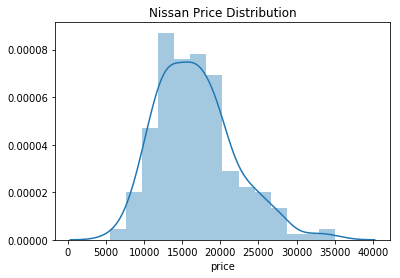

In [42]:
sns.distplot(nissan.price).set_title('Nissan Price Distribution')

###### View Nissan price over $30,000

In [58]:
nissan.loc[nissan.price>30000]

,brand,city_mpg,drivetrain,engine,exterior_color,fuel_type,highway_mpg,make,mileage,model,price,transmission,year,yr_old
1331,2018 Nissan Armada SL,13.0,AWD,5.6L V8 32V GDI DOHC,Super Black,Gasoline,18.0,Nissan,40047,Armada,34995,7-Speed Automatic,2018,1
2684,2018 Nissan Pathfinder SL,20.0,4WD,6 Cylinder,Magnetic Black,Gasoline,27.0,Nissan,14487,Pathfinder,32995,CVT,2018,1
2688,2017 Nissan Titan SV,15.0,4WD,8 Cylinder,Gun Metallic,Gasoline,21.0,Nissan,38061,Titan,31995,Automatic,2017,2


###### Make Honda sub df, view price distribution

In [43]:
honda = df.loc[df.make=='Honda']

Text(0.5, 1.0, 'Honda Price Distribution')

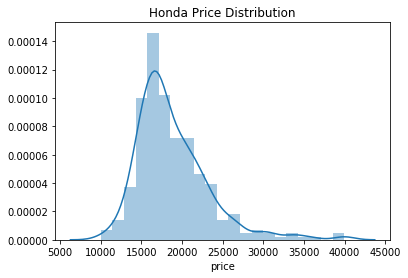

In [44]:
sns.distplot(honda.price).set_title('Honda Price Distribution')

###### View Honda Price over $35,0000

In [47]:
honda.loc[honda.price>35000]

,brand,city_mpg,drivetrain,engine,exterior_color,fuel_type,highway_mpg,make,mileage,model,price,transmission,year,yr_old
739,2018 Honda Civic Type R Touring,22.0,FWD,2.0L I4 16V GDI DOHC Turbo,Rallye Red,Gasoline,28.0,Honda,3531,Civic,35995,6-Speed Manual,2018,1
1655,Certified 2018 Honda Pilot Elite,19.0,AWD,Regular Unleaded V-6 3.5 L/212,Black Forest Pearl,Gasoline,26.0,Honda,19125,Pilot,39995,9-Speed Automatic w/OD,2018,1
2364,Certified 2017 Honda Pilot Elite,19.0,AWD,Regular Unleaded V-6 3.5 L/212,Crystal Black Pearl,Gasoline,26.0,Honda,8250,Pilot,39990,9-Speed Automatic w/OD,2017,2


###### Make Mercedes sub df, view price distribution

In [48]:
mercedes = df.loc[df.make=='Mercedes-Benz']

Text(0.5, 1.0, 'Mercedes Price Distribution')

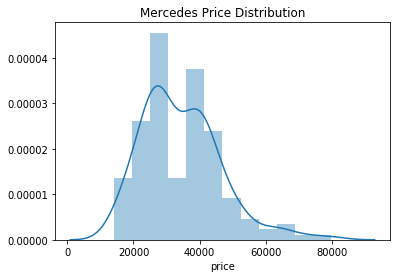

In [49]:
sns.distplot(mercedes.price).set_title('Mercedes Price Distribution')

In [59]:
mercedes.loc[mercedes.price>60000]

,brand,city_mpg,drivetrain,engine,exterior_color,fuel_type,highway_mpg,make,mileage,model,price,transmission,year,yr_old
358,2017 Mercedes-Benz S 550 4MATIC,16.0,4MATIC,4.7L V8 BiTurbo,Iridium Silver Metallic,Gasoline,25.0,Mercedes-Benz,31731,S,62170,9-Speed Automatic,2017,2
359,2017 Mercedes-Benz S 550 4MATIC,16.0,4MATIC,4.7L V8 BiTurbo,Selenite Gray Metallic,Gasoline,25.0,Mercedes-Benz,19415,S,63899,9-Speed Automatic,2017,2
436,2018 Mercedes-Benz GLS 450 Base 4MATIC,17.0,4MATIC,V6,Black,Gasoline,22.0,Mercedes-Benz,5273,GLS,63975,9-Speed Automatic,2018,1
781,Certified 2015 Mercedes-Benz SL 63 AMG,16.0,RWD,5.5L V8 32V GDI DOHC Twin Turbo,Black,Gasoline,25.0,Mercedes-Benz,18954,SL,79901,7-Speed Automatic,2015,4
2031,Certified 2015 Mercedes-Benz S 550 4MATIC,16.0,AWD,4.7L V8 32V GDI DOHC Twin Turbo,Anthracite Blue,Gasoline,24.0,Mercedes-Benz,22845,S,72901,7-Speed Automatic,2015,4
3043,2015 Mercedes-Benz S 63 AMG,15.0,NaN,5.5L V8 DOHC 32V,Black,Gasoline,23.0,Mercedes-Benz,24429,S,67995,Automatic,2015,4


In [51]:
maserati = df.loc[df.make=='Maserati']

Text(0.5, 1.0, 'Maserati Price Distribution')

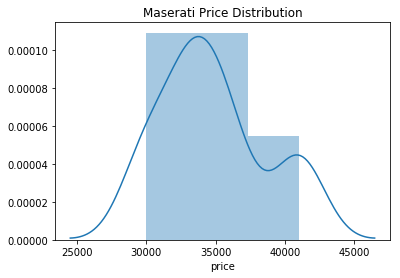

In [53]:
sns.distplot(maserati.price).set_title('Maserati Price Distribution')

In [60]:
maserati

,brand,city_mpg,drivetrain,engine,exterior_color,fuel_type,highway_mpg,make,mileage,model,price,transmission,year,yr_old
87,2015 Maserati Ghibli S Q4,15.0,AWD,3.0L V6 24V GDI DOHC Twin Turbo,Blu,Gasoline,25.0,Maserati,11966,Ghibli,32798,8-Speed Automatic,2015,4
617,2016 Maserati Ghibli S Q4,16.0,AWD,V6 Cylinder Engine,Champagne Metallescent,Gasoline,24.0,Maserati,42614,Ghibli,29990,Automatic,2016,3
856,2016 Maserati Ghibli S Q4,16.0,NaN,3.0L V6 DOHC 24V,Grey,Gasoline,24.0,Maserati,38456,Ghibli,33995,Automatic,2016,3
1774,2016 Maserati Ghibli S Q4,16.0,AWD,3.0L V6 24V GDI DOHC Twin Turbo,Bianco,Gasoline,24.0,Maserati,11216,Ghibli,40998,8-Speed Automatic,2016,3
2449,2016 Maserati Ghibli S Q4,16.0,AWD,3.0L V6 24V GDI DOHC Twin Turbo,Rosso Folgore Mica,Gasoline,24.0,Maserati,32533,Ghibli,35998,8-Speed Automatic,2016,3


In [54]:
porsche = df.loc[df.make=='Porsche']

In [55]:
porsche

,brand,city_mpg,drivetrain,engine,exterior_color,fuel_type,highway_mpg,make,mileage,model,price,transmission,year,yr_old
911,2016 Porsche Cayenne S,17.0,AWD,3.6L V6 24V GDI DOHC Twin Turbo,Gray,Gasoline,24.0,Porsche,48191,Cayenne,44656,8-Speed Automatic,2016,3
1041,2017 Porsche Cayenne GTS,16.0,AWD,3.6L V6 24V GDI DOHC Twin Turbo,Silver,Gasoline,23.0,Porsche,60160,Cayenne,54900,8-Speed Automatic,2017,2
1822,2016 Porsche Cayenne Base,19.0,AWD,3.6L V6 24V GDI DOHC,Meteor Gray Metallic,Gasoline,24.0,Porsche,28416,Cayenne,43800,8-Speed Automatic,2016,3
1858,2016 Porsche Cayenne S,17.0,AWD,3.6L V6 24V GDI DOHC Twin Turbo,Black,Gasoline,24.0,Porsche,32494,Cayenne,48594,8-Speed Automatic,2016,3


Text(0.5, 1.0, 'Porsche Price Distribution')

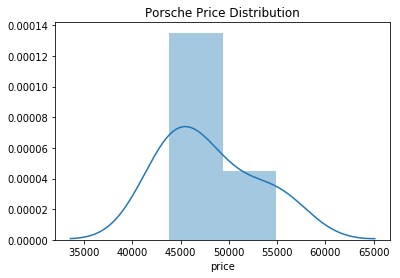

In [56]:
sns.distplot(porsche.price).set_title('Porsche Price Distribution')

In [24]:
# Checking the different relationship between the continuous data

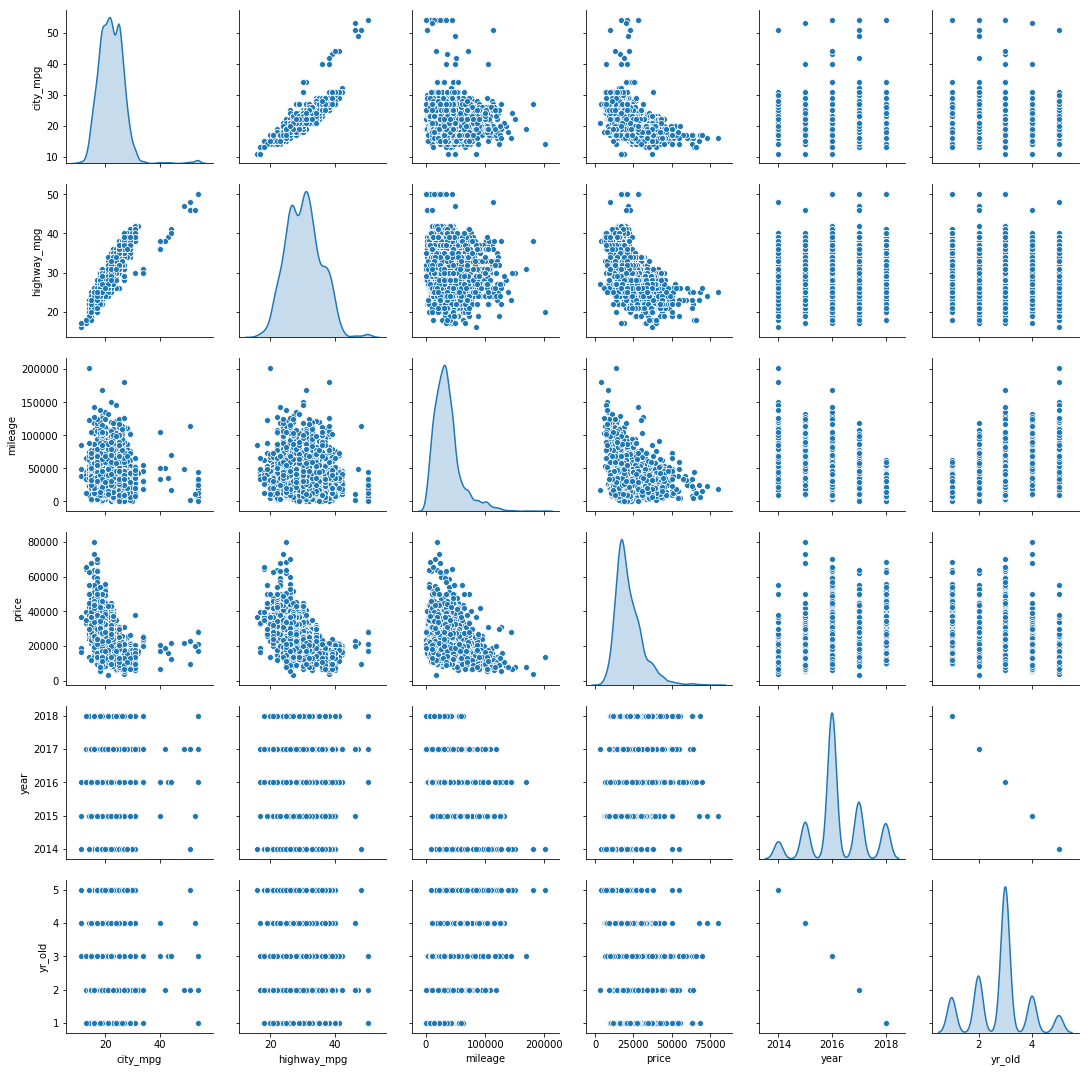

In [25]:
sns.pairplot(df, diag_kind="kde", height=2.5)

In [ ]:
# price is the variable we would like to predict from the other variables
# as such, we replotted price vs the list below

In [26]:
columns = ['city_mpg', 'highway_mpg', 'mileage', 'yr_old']

In [27]:
n = 4
row_groups= [columns[i:i+n] for i in range(0, len(columns), n) ]
row_groups

[['city_mpg', 'highway_mpg', 'mileage', 'yr_old']]

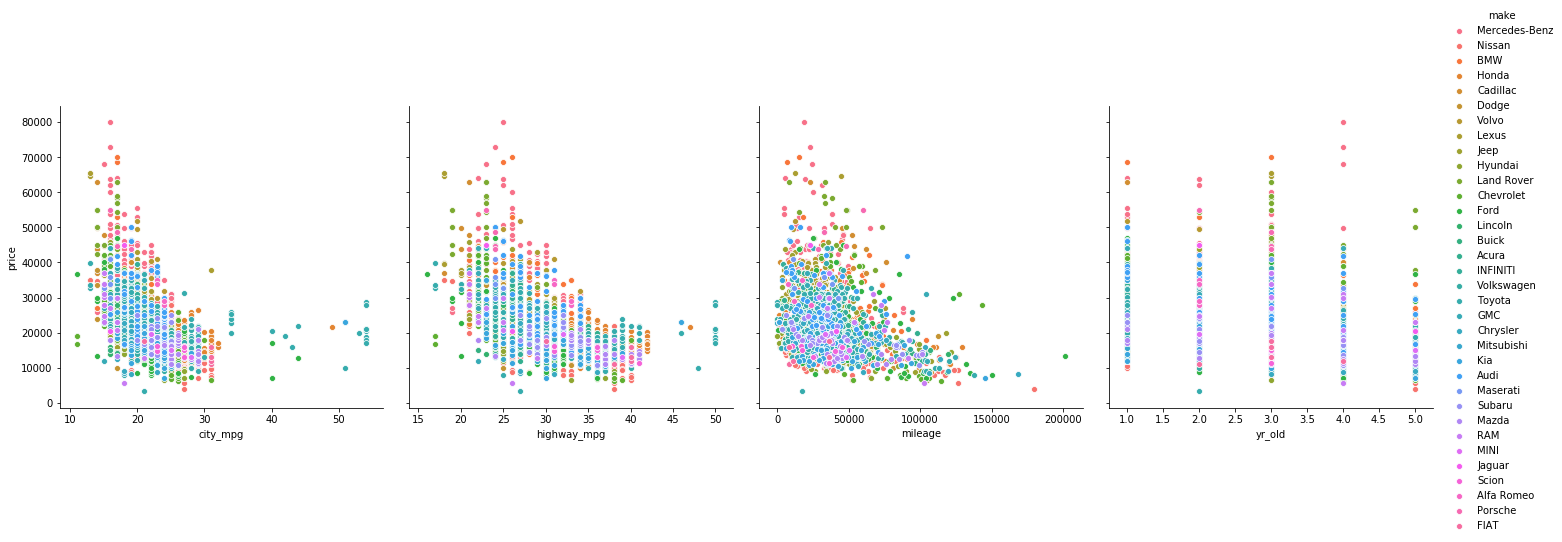

In [28]:
for i in row_groups:
    pp = sns.pairplot(data=df, y_vars=['price'],x_vars=i, hue='make', height=5)

In [29]:
# Two additonal variables were introduced which were: 
# 1. the cars that are considered to be luxury cars as a binary variable.
# 2. and the cars that are considered to be low mileage <= 7,500mi as a binary variable.

In [25]:
luxury = ['Mercedes-Benz', 'BMW', 'Lexus', 'Acura', 'Audi', 'INFINITI', 'Cadillac', 'Land Rover', 'Volvo', 'Lincoln', 'Maserati', 'Alfa Romeo', 'Porsche', 'Jaguar']
df['luxury'] = np.where(df['make'].isin(luxury), 1, 0)
df['low_mileage']= np.where(df['mileage']<=7500, 1, 0)

In [32]:
# checking number of cars considered to be of low mileage
df.low_mileage.value_counts()

0    2571
1     106
Name: low_mileage, dtype: int64

In [33]:
# checking for NaN objects- none are found for relevant variables
df.isna().sum()

brand                0
city_mpg             0
drivetrain         113
engine              92
exterior_color      20
fuel_type            0
highway_mpg          0
make                 0
mileage              0
model               37
price                0
transmission        22
year                 0
yr_old               0
luxury               0
low_mileage          0
price_log            0
mileage_log          0
highway_mpg_log      0
yr_old_log           0
city_mpg_log         0
dtype: int64

In [26]:
# creating converting data into log for future
df['price_log'] = np.log(df['price'])
df['mileage_log'] = np.log(df['mileage'])
df['highway_mpg_log'] = np.log(df['highway_mpg'])
df['yr_old_log'] = np.log(df['yr_old'])
df['city_mpg_log'] = np.log(df['city_mpg'])

Checking different model coefficents, p-values and R-squared values in order to determine what is the best model to use. This will be done by setting the target value as 'price' with various variable combinations.

In [36]:
#Target: Price vs Variable: City_mpg
car_model = ols(formula='price~city_mpg', data=df).fit()
car_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     831.3
Date:                Thu, 22 Aug 2019   Prob (F-statistic):          2.06e-159
Time:                        17:21:16   Log-Likelihood:                -27793.
No. Observations:                2677   AIC:                         5.559e+04
Df Residuals:                    2675   BIC:                         5.560e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.296e+04    734.450     58.493      0.000    4.15e+04    4.44e+04
city_mpg    -925.5909     32.103    -28.832      0.000    -988.540    -862.641
==============================================================================
Omnibus:                      825.199   Durbin-Watson:                   1.506
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3020.224
Skew:                           1.498   Prob(JB):                         0.00
Kurtosis:                       7.255   Cond. No.                         111.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
#Target: Price vs Variable: Highway_mpg
car_model = ols(formula='price~highway_mpg', data=df).fit()
car_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     1392.
Date:                Thu, 22 Aug 2019   Prob (F-statistic):          1.26e-245
Time:                        17:24:10   Log-Likelihood:                -27595.
No. Observations:                2677   AIC:                         5.519e+04
Df Residuals:                    2675   BIC:                         5.521e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.234e+04    819.084     63.904      0.000    5.07e+04    5.39e+04
highway_mpg  -992.4719     26.603    -37.306      0.000   -1044.637    -940.306
==============================================================================
Omnibus:                      734.514   Durbin-Watson:                   1.504
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3068.719
Skew:                           1.277   Prob(JB):                         0.00
Kurtosis:                       7.581   Cond. No.                         180.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
#Target: Price vs Variable: Mileage
mileage_model = ols(formula='price~mileage', data=df).fit()
mileage_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     257.5
Date:                Thu, 22 Aug 2019   Prob (F-statistic):           2.17e-55
Time:                        17:24:53   Log-Likelihood:                -28033.
No. Observations:                2677   AIC:                         5.607e+04
Df Residuals:                    2675   BIC:                         5.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.642e+04    308.546     85.625      0.000    2.58e+04     2.7e+04
mileage       -0.1150      0.007    -16.046      0.000      -0.129      -0.101
==============================================================================
Omnibus:                      833.662   Durbin-Watson:                   1.588
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2791.534
Skew:                           1.552   Prob(JB):                         0.00
Kurtosis:                       6.923   Cond. No.                     8.04e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
# Target: Price vs Variable: Make
make_model = ols(formula='price~make', data=df).fit()
make_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     58.06
Date:                Thu, 22 Aug 2019   Prob (F-statistic):          9.39e-284
Time:                        17:25:19   Log-Likelihood:                -27426.
No. Observations:                2677   AIC:                         5.492e+04
Df Residuals:                    2643   BIC:                         5.512e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              2.491e+04    780.991     31.891      0.000    2.34e+04    2.64e+04
make[T.Alfa Romeo]     6567.1753   3514.461      1.869      0.062    -324.198    1.35e+04
make[T.Audi]           3368.7699   1115.627      3.020      0.003    1181.180    5556.360
make[T.BMW]            2346.0503    988.367      2.374      0.018     407.999    4284.101
make[T.Buick]         -4652.0344   1457.731     -3.191      0.001   -7510.443   -1793.626
make[T.Cadillac]       7802.5984   1554.455      5.020      0.000    4754.527    1.09e+04
make[T.Chevrolet]     -4547.3084    995.884     -4.566      0.000   -6500.099   -2594.518
make[T.Chrysler]      -6940.4809   1441.400     -4.815      0.000   -9766.867   -4114.095
make[T.Dodge]          -617.4406   1136.052     -0.543      0.587   -2845.081    1610.200
make[T.FIAT]          -1.102e+04   3162.774     -3.484      0.001   -1.72e+04   -4817.762
make[T.Ford]          -5199.8690    952.471     -5.459      0.000   -7067.532   -3332.205
make[T.GMC]            2172.7110   1512.383      1.437      0.151    -792.864    5138.286
make[T.Honda]         -6083.9671    874.908     -6.954      0.000   -7799.541   -4368.393
make[T.Hyundai]       -8564.6997    967.523     -8.852      0.000   -1.05e+04   -6667.521
make[T.INFINITI]      -1827.2792   1149.588     -1.590      0.112   -4081.463     426.904
make[T.Jaguar]         7791.1753   4908.455      1.587      0.113   -1833.626    1.74e+04
make[T.Jeep]          -1886.7377    974.823     -1.935      0.053   -3798.232      24.756
make[T.Kia]           -8878.5986   1119.516     -7.931      0.000   -1.11e+04   -6683.382
make[T.Land Rover]     1.977e+04   1577.525     12.533      0.000    1.67e+04    2.29e+04
make[T.Lexus]          6169.8450   1014.538      6.081      0.000    4180.477    8159.213
make[T.Lincoln]       -3434.4358   2414.205     -1.423      0.155   -8168.359    1299.488
make[T.MINI]          -9025.3247   4033.022     -2.238      0.025   -1.69e+04   -1117.125
make[T.Maserati]       9849.4753   3162.774      3.114      0.002    3647.712    1.61e+04
make[T.Mazda]         -9452.1188   1411.134     -6.698      0.000   -1.22e+04   -6685.080
make[T.Mercedes-Benz]  9528.1816    950.518     10.024      0.000    7664.347    1.14e+04
make[T.Mitsubishi]    -1.036e+04   2414.205     -4.291      0.000   -1.51e+04   -5625.179
make[T.Nissan]        -7527.1876    849.104     -8.865      0.000   -9192.164   -5862.211
make[T.Porsche]        2.308e+04   3514.461      6.567      0.000    1.62e+04       3e+04
make[T.RAM]             228.6753   2054.924      0.111      0.911   -3800.747    4258.098
make[T.Scion]         -1.028e+04   2705.433     -3.800      0.000   -1.56e+04   -4974.629
make[T.Subaru]        -6743.5469   1532.784     -4.400      0.000   -9749.125   -3737.969
make[T.Toyota]        -

In [40]:
# Traget: Price vs Variable: Mileage, City_mpg, Highway_mpg, Years Old and All Car Make
car_model = ols(formula='price~mileage+city_mpg+highway_mpg+yr_old+make', data=df).fit()
car_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     173.6
Date:                Thu, 22 Aug 2019   Prob (F-statistic):               0.00
Time:                        18:43:47   Log-Likelihood:                -26504.
No. Observations:                2677   AIC:                         5.308e+04
Df Residuals:                    2639   BIC:                         5.331e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              5.708e+04    871.075     65.533      0.000    5.54e+04    5.88e+04
make[T.Alfa Romeo]     5920.8642   2494.842      2.373      0.018    1028.820    1.08e+04
make[T.Audi]           3231.9277    793.885      4.071      0.000    1675.228    4788.627
make[T.BMW]            4545.6909    704.724      6.450      0.000    3163.824    5927.558
make[T.Buick]         -4727.1023   1037.406     -4.557      0.000   -6761.313   -2692.891
make[T.Cadillac]       5626.3107   1106.880      5.083      0.000    3455.869    7796.752
make[T.Chevrolet]     -3113.6917    708.928     -4.392      0.000   -4503.803   -1723.581
make[T.Chrysler]      -5002.6407   1025.450     -4.878      0.000   -7013.409   -2991.873
make[T.Dodge]         -3283.9446    809.400     -4.057      0.000   -4871.067   -1696.823
make[T.FIAT]          -5192.8379   2254.114     -2.304      0.021   -9612.848    -772.828
make[T.Ford]          -4414.1757    682.625     -6.466      0.000   -5752.709   -3075.642
make[T.GMC]            -927.2595   1078.684     -0.860      0.390   -3042.411    1187.892
make[T.Honda]         -2332.8421    632.262     -3.690      0.000   -3572.620   -1093.064
make[T.Hyundai]       -7597.6693    691.250    -10.991      0.000   -8953.117   -6242.222
make[T.INFINITI]      -2278.3524    823.883     -2.765      0.006   -3893.875    -662.830
make[T.Jaguar]         4788.7573   3484.871      1.374      0.170   -2044.598    1.16e+04
make[T.Jeep]          -2911.2742    699.921     -4.159      0.000   -4283.725   -1538.824
make[T.Kia]           -6781.6771    800.813     -8.468      0.000   -8351.961   -5211.393
make[T.Land Rover]     1.606e+04   1131.645     14.191      0.000    1.38e+04    1.83e+04
make[T.Lexus]          4216.8402    729.772      5.778      0.000    2785.856    5647.824
make[T.Lincoln]       -4200.1212   1715.728     -2.448      0.014   -7564.430    -835.813
make[T.MINI]          -3329.9167   2863.865     -1.163      0.245   -8945.564    2285.731
make[T.Maserati]       5850.5880   2247.893      2.603      0.009    1442.776    1.03e+04
make[T.Mazda]         -2823.8576   1011.839     -2.791      0.005   -4807.935    -839.781
make[T.Mercedes-Benz]  8132.6908    681.234     11.938      0.000    6796.885    9468.497
make[T.Mitsubishi]    -1.156e+04   1722.878     -6.709      0.000   -1.49e+04   -8180.700
make[T.Nissan]        -4342.7912    613.190     -7.082      0.000   -5545.174   -3140.409
make[T.Porsche]        1.911e+04   2496.940      7.652      0.000    1.42e+04     2.4e+04
make[T.RAM]           -1750.8237   1467.937     -1.193      0.233   -4629.248    1127.600
make[T.Scion]         -5601.4672   1925.215     -2.910      0.004   -9376.551   -1826.384
make[T.Subaru]        -3941.0746   1097.019     -3.593      0.000   -6092.178   -1789.971
make[T.Toyota]        -

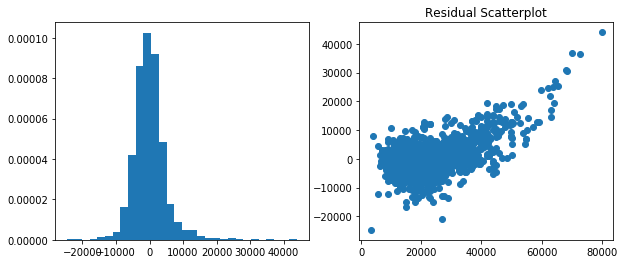

In [86]:
checkresiduals(df, 'price', car_model)

In [ ]:
# Residual is dispersed

In [90]:
# Target: Price vs all + Mileage, City_mpg, Highway_mpg, Years Old and Cars Considered as Luxurious
car_lux_model = ols(formula='price~mileage+city_mpg+highway_mpg+yr_old+luxury', data=df).fit()
car_lux_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     889.0
Date:                Thu, 22 Aug 2019   Prob (F-statistic):               0.00
Time:                        16:04:44   Log-Likelihood:                -26844.
No. Observations:                2677   AIC:                         5.370e+04
Df Residuals:                    2671   BIC:                         5.374e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.405e+04    737.279     73.315      0.000    5.26e+04    5.55e+04
mileage        -0.1004      0.005    -18.684      0.000      -0.111      -0.090
city_mpg      276.5644     49.124      5.630      0.000     180.239     372.890
highway_mpg -1084.1649     43.341    -25.015      0.000   -1169.151    -999.179
yr_old      -1301.6877    123.100    -10.574      0.000   -1543.069   -1060.307
luxury       8208.0310    252.329     32.529      0.000    7713.251    8702.811
==============================================================================
Omnibus:                      918.893   Durbin-Watson:                   1.765
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6570.900
Skew:                           1.437   Prob(JB):                         0.00
Kurtosis:                      10.117   Cond. No.                     3.01e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.01e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

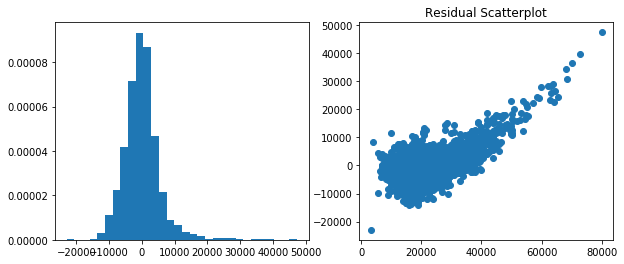

In [91]:
checkresiduals(df, 'price', car_lux_model)

In [ ]:
# Residual is dispersed

In [41]:
# Target: Price vs Mileage, City_mpg, Highway_mpg, Years Old, Cars Considered as Luxurious and Cars with Milage <= 7500 mi
car_lux_low_model = ols(formula='price~mileage+low_mileage+city_mpg+highway_mpg+yr_old+luxury', data=df).fit()
car_lux_low_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     741.8
Date:                Thu, 22 Aug 2019   Prob (F-statistic):               0.00
Time:                        18:49:47   Log-Likelihood:                -26843.
No. Observations:                2677   AIC:                         5.370e+04
Df Residuals:                    2670   BIC:                         5.374e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.392e+04    741.425     72.724      0.000    5.25e+04    5.54e+04
mileage        -0.0986      0.005    -18.039      0.000      -0.109      -0.088
low_mileage   955.6333    572.175      1.670      0.095    -166.318    2077.585
city_mpg      268.9988     49.316      5.455      0.000     172.297     365.701
highway_mpg -1079.3563     43.422    -24.857      0.000   -1164.501    -994.211
yr_old      -1281.4600    123.653    -10.363      0.000   -1523.926   -1038.994
luxury       8210.9112    252.250     32.551      0.000    7716.285    8705.537
==============================================================================
Omnibus:                      914.785   Durbin-Watson:                   1.767
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6520.932
Skew:                           1.431   Prob(JB):                         0.00
Kurtosis:                      10.090   Cond. No.                     3.06e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

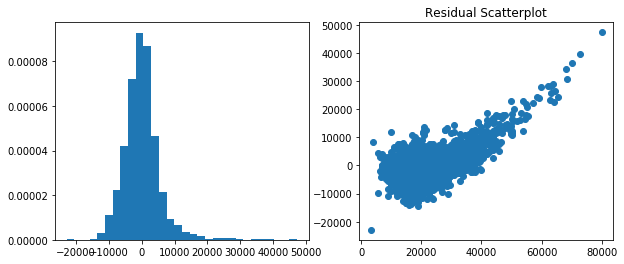

In [93]:
checkresiduals(df, 'price', car_lux_low_model)

In [ ]:
# Residual is dispersed

In [47]:
# Here we will try to capture non-linear relationships to improve our results
# Target: Log of Price vs Mileage, City_mpg, Highway_mpg, Years Old, All Car Make and Cars with Milage <= 7500 mi
price_log_low_model = ols(formula='price_log~mileage+low_mileage+city_mpg+highway_mpg+yr_old+make', data=df).fit()
price_log_low_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     211.0
Date:                Thu, 22 Aug 2019   Prob (F-statistic):               0.00
Time:                        18:57:11   Log-Likelihood:                 671.29
No. Observations:                2677   AIC:                            -1265.
Df Residuals:                    2638   BIC:                            -1035.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                11.5796      0.034    339.368      0.000      11.513      11.646
make[T.Alfa Romeo]        0.2076      0.097      2.132      0.033       0.017       0.399
make[T.Audi]              0.1037      0.031      3.346      0.001       0.043       0.164
make[T.BMW]               0.1743      0.028      6.338      0.000       0.120       0.228
make[T.Buick]            -0.2231      0.040     -5.509      0.000      -0.302      -0.144
make[T.Cadillac]          0.1342      0.043      3.107      0.002       0.050       0.219
make[T.Chevrolet]        -0.1928      0.028     -6.967      0.000      -0.247      -0.139
make[T.Chrysler]         -0.2599      0.040     -6.495      0.000      -0.338      -0.181
make[T.Dodge]            -0.1560      0.032     -4.940      0.000      -0.218      -0.094
make[T.FIAT]             -0.3294      0.088     -3.744      0.000      -0.502      -0.157
make[T.Ford]             -0.2427      0.027     -9.110      0.000      -0.295      -0.190
make[T.GMC]              -0.0886      0.042     -2.104      0.035      -0.171      -0.006
make[T.Honda]            -0.1156      0.025     -4.686      0.000      -0.164      -0.067
make[T.Hyundai]          -0.3951      0.027    -14.642      0.000      -0.448      -0.342
make[T.INFINITI]         -0.0932      0.032     -2.899      0.004      -0.156      -0.030
make[T.Jaguar]            0.0826      0.136      0.608      0.544      -0.184       0.349
make[T.Jeep]             -0.1404      0.027     -5.141      0.000      -0.194      -0.087
make[T.Kia]              -0.3595      0.031    -11.501      0.000      -0.421      -0.298
make[T.Land Rover]        0.3996      0.044      9.047      0.000       0.313       0.486
make[T.Lexus]             0.1262      0.028      4.431      0.000       0.070       0.182
make[T.Lincoln]          -0.1799      0.067     -2.687      0.007      -0.311      -0.049
make[T.MINI]             -0.1755      0.112     -1.571      0.116      -0.395       0.044
make[T.Maserati]          0.1662      0.088      1.895      0.058      -0.006       0.338
make[T.Mazda]            -0.1636      0.039     -4.144      0.000      -0.241      -0.086
make[T.Mercedes-Benz]     0.2209      0.027      8.310      0.000       0.169       0.273
make[T.Mitsubishi]       -0.5852      0.067     -8.702      0.000      -0.717      -0.453
make[T.Nissan]           -0.2354      0.024     -9.838      0.000      -0.282      -0.189
make[T.Porsche]           0.5031      0.097      5.163      0.000       0.312       0.694
make[T.RAM]              -0.1254      0.057     -2.190      0.029      -0.238      -0.013
make[T.Scion]            -0.3129      0.075     -4.164      0.000      -0.460      -0.166
make[T.Subaru]           -0.1732      0.043     -4.044      0.000      -0.257      -0.089
make[T.Toyota]         

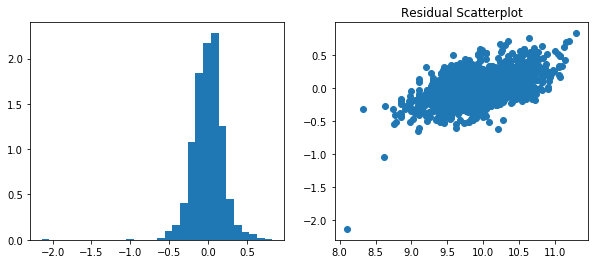

In [48]:
checkresiduals(df, 'price_log', price_log_low_model)

In [ ]:
# Residual dispersion improved

In [143]:
# Target: Log of Price vs Mileage, City_mpg, Highway_mpg, Years Old, Cars Considered as Luxurious and Cars with Milage <= 7500 mi
price_log_lux_low_model = ols(formula='price_log~mileage+low_mileage+city_mpg+highway_mpg+yr_old+luxury', data=df).fit()
price_log_lux_low_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     957.1
Date:                Thu, 22 Aug 2019   Prob (F-statistic):               0.00
Time:                        16:29:24   Log-Likelihood:                 338.77
No. Observations:                2677   AIC:                            -663.5
Df Residuals:                    2670   BIC:                            -622.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      11.3940      0.029    394.734      0.000      11.337      11.451
mileage     -5.449e-06   2.13e-07    -25.597      0.000   -5.87e-06   -5.03e-06
low_mileage     0.0044      0.022      0.197      0.844      -0.039       0.048
city_mpg        0.0133      0.002      6.945      0.000       0.010       0.017
highway_mpg    -0.0489      0.002    -28.955      0.000      -0.052      -0.046
yr_old         -0.0569      0.005    -11.812      0.000      -0.066      -0.047
luxury          0.3272      0.010     33.314      0.000       0.308       0.346
==============================================================================
Omnibus:                      265.793   Durbin-Watson:                   1.756
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1454.210
Skew:                          -0.301   Prob(JB):                         0.00
Kurtosis:                       6.560   Cond. No.                     3.06e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

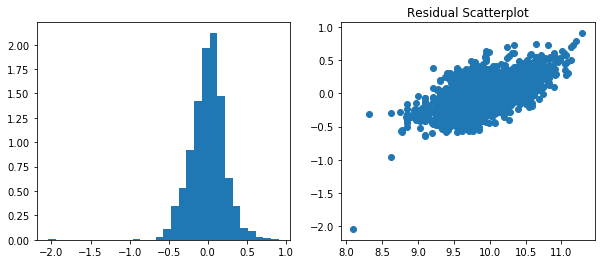

In [101]:
checkresiduals(df, 'price_log', price_log_lux_low_model)

In [54]:
# Target: Log of Price vs City_mpg, Highway_mpg, Years Old, Cars Considered as Luxurious and Cars with Milage <= 7500 mi
price_log_luxlow_model = ols(formula='price_log~low_mileage+city_mpg+highway_mpg+yr_old+luxury', data=df).fit()
price_log_luxlow_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     817.3
Date:                Thu, 22 Aug 2019   Prob (F-statistic):               0.00
Time:                        19:01:02   Log-Likelihood:                 45.030
No. Observations:                2677   AIC:                            -78.06
Df Residuals:                    2671   BIC:                            -42.70
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      11.2875      0.032    354.170      0.000      11.225      11.350
low_mileage     0.1121      0.024      4.592      0.000       0.064       0.160
city_mpg        0.0162      0.002      7.575      0.000       0.012       0.020
highway_mpg    -0.0491      0.002    -26.040      0.000      -0.053      -0.045
yr_old         -0.1145      0.005    -24.115      0.000      -0.124      -0.105
luxury          0.3530      0.011     32.390      0.000       0.332       0.374
==============================================================================
Omnibus:                      288.249   Durbin-Watson:                   1.617
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              875.177
Skew:                          -0.558   Prob(JB):                    9.07e-191
Kurtosis:                       5.570   Cond. No.                         269.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

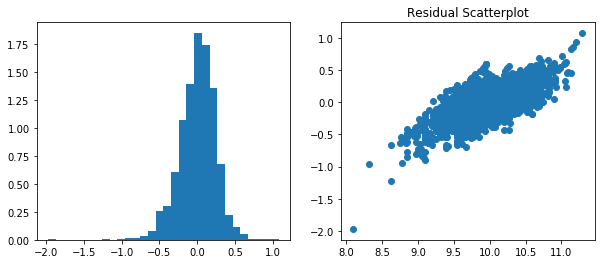

In [55]:
checkresiduals(df, 'price_log', price_log_luxlow_model)

In [56]:
# Target: Log of Price vs Log of (City_mpg, Highway_mpg, Years Old and Mileage), Cars Considered as Luxurious and Cars with Milage <= 7500 mi
price_log_log_model = ols(formula='price_log~mileage_log+city_mpg_log+highway_mpg_log+yr_old_log+luxury', data=df).fit()
price_log_log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     966.8
Date:                Thu, 22 Aug 2019   Prob (F-statistic):               0.00
Time:                        19:02:39   Log-Likelihood:                 185.51
No. Observations:                2677   AIC:                            -359.0
Df Residuals:                    2671   BIC:                            -323.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          15.4448      0.115    133.914      0.000      15.219      15.671
mileage_log        -0.1390      0.006    -21.467      0.000      -0.152      -0.126
city_mpg_log        0.0770      0.057      1.358      0.174      -0.034       0.188
highway_mpg_log    -1.2577      0.062    -20.210      0.000      -1.380      -1.136
yr_old_log         -0.1396      0.011    -12.154      0.000      -0.162      -0.117
luxury              0.3355      0.010     32.275      0.000       0.315       0.356
==============================================================================
Omnibus:                      349.953   Durbin-Watson:                   1.699
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1256.519
Skew:                          -0.626   Prob(JB):                    1.41e-273
Kurtosis:                       6.114   Cond. No.                         312.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

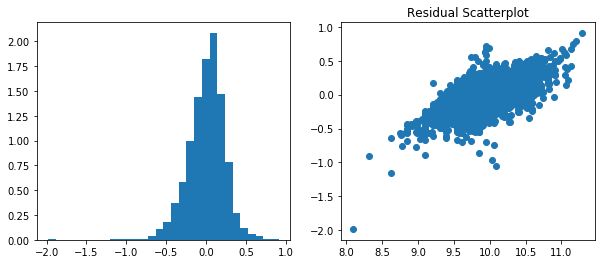

In [58]:
checkresiduals(df, 'price_log', price_log_log_model)

## Linear Regression Model

In [4]:
def model1(x):
    x = np.array(x)
    coeff = np.array([-5.449e-06, 0.0044, 0.0133, -0.0489, -0.0569, 0.3272])
    y = 11.3940+(np.sum(np.multiply(x, coeff)))
    return round(np.exp(y),0)

In [5]:
ins = input("""Enter the parameters in the order shown below separated by commas 
                        1. Max mileage(integer and less than 80000mi),
                        2. required city_mpg(integer and between 11 - 54 only), 
                        3. required highway_mpg(integer and between 16-50 only), 
                        4. year (integer and between 2018-2014 only),
                        5. luxury brand? (if yes enter 1 otherwise 0)""")

Enter the parameters in the order shown below separated by commas 
                        1. Max mileage(integer and less than 80000mi),
                        2. required city_mpg(integer and between 11 - 54 only), 
                        3. required highway_mpg(integer and between 16-50 only), 
                        4. year (integer and between 2018-2014 only),
                        5. luxury brand? (if yes enter 1 otherwise 0)10000, 25,25,2018,1


In [6]:
x = ins.split(",")
x.insert(1, 'replace me!')
x[0] = int(x[0])
x[1] = 1 if x[0] <= 7500 else 0
x[2] = int(x[2])
x[3] = int(x[3])
x[4] = 2019 - int(x[4])
x[5] = int(x[5])

In [7]:
model1(x)

45243.0

In [27]:
all_x = []
all_y_actual = []
for ind in df.index:
    x_values = [df['mileage'][ind], df['low_mileage'][ind], df['city_mpg'][ind], df['highway_mpg'][ind], df['yr_old'][ind], df['luxury'][ind]]
    all_x.append(x_values)
    all_y_actual.append(df['price'][ind])

y_predict = []
for x in all_x:
    y_predict.append(model1(x))

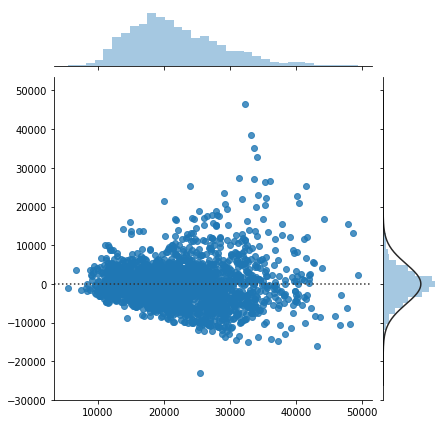

In [28]:
sns.jointplot(x=y_predict, y=all_y_actual, kind='resid')